In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the dataset
# Display first 5 rows

In [5]:
df = pd.read_csv("C://Users//manda//Downloads//archive (1)//Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Explore the dataset
# Shape of data
# Column names 
# info about data types
# Missing values

In [6]:
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())
print(df.isnull().sum())

Shape: (6435, 8)
Columns: Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


# Convert Date column to datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True, errors = 'coerce')

# Extract new columns

In [11]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df[['Date','Month','Day','Weekday']].head()

,Date,Month,Day,Weekday
0,2010-02-05,2,5,Friday
1,2010-02-12,2,12,Friday
2,2010-02-19,2,19,Friday
3,2010-02-26,2,26,Friday
4,2010-03-05,3,5,Friday


In [15]:
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Day', 'Weekday'],
      dtype='object')


# Total Weekly Sales by store
# plotting bar chart

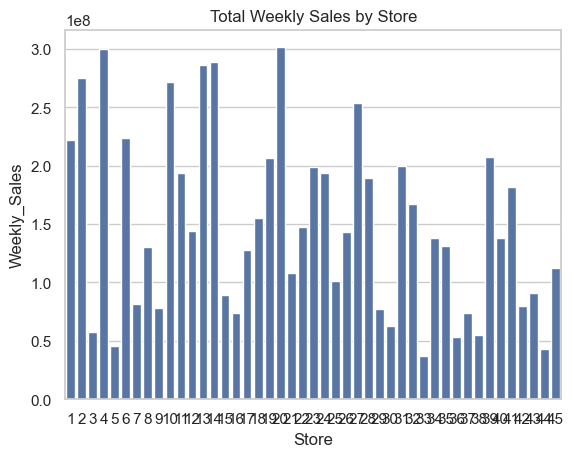

In [17]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot( x = 'Store', y = 'Weekly_Sales', data = store_sales)
plt.title("Total Weekly Sales by Store")
plt.show()

# Too many stores are there (1 to 45) and chart is too wide , stort and take top 10 stores.

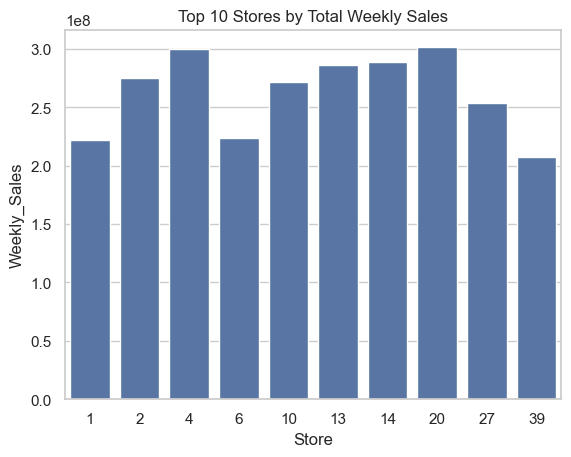

In [22]:
top_stores = store_sales.sort_values(by = 'Weekly_Sales' , ascending=False).head(10)
sns.barplot( x = 'Store' , y = 'Weekly_Sales', data = top_stores)
plt.title( "Top 10 Stores by Total Weekly Sales")
plt.show()

# Monthly Sales Trend

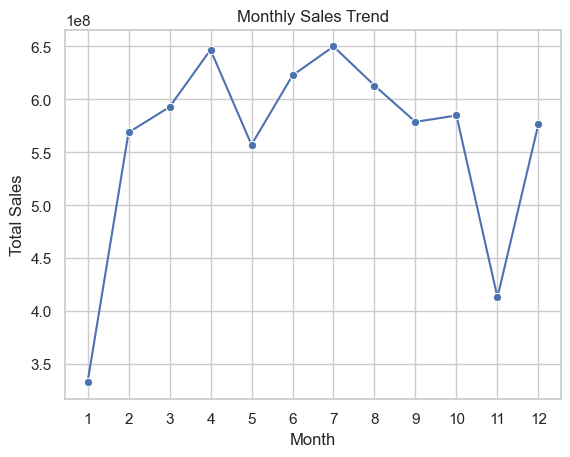

In [25]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Weekly_Sales',data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(range(1,13)) # Months 1 to 12
plt.ylabel("Total Sales")
plt.show()

# Holiday vs Non-Holiday Sales

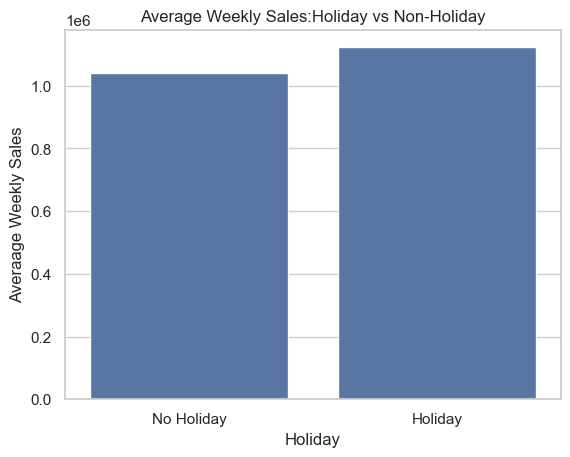

In [29]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_sales['Holiday'] = holiday_sales['Holiday_Flag'].map({0:'No Holiday', 1:'Holiday'})
sns.barplot(x='Holiday',y='Weekly_Sales', data=holiday_sales)
plt.title("Average Weekly Sales:Holiday vs Non-Holiday")
plt.ylabel("Averaage Weekly Sales")
plt.show()

# Effect of Temperature on Sales

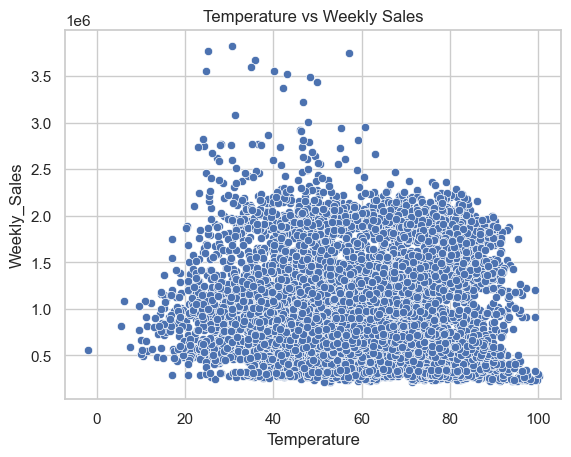

In [30]:
sns.scatterplot(x='Temperature',y='Weekly_Sales', data=df)
plt.title("Temperature vs Weekly Sales")
plt.show()

# Top 10 weeks with Highest Sales

In [32]:
top_weeks = df.sort_values(by='Weekly_Sales',ascending=False).head(10)
print(top_weeks[['Date', 'Store','Weekly_Sales']])

           Date  Store  Weekly_Sales
1905 2010-12-24     14    3818686.45
2763 2010-12-24     20    3766687.43
1333 2010-12-24     10    3749057.69
527  2011-12-23      4    3676388.98
1762 2010-12-24     13    3595903.20
1814 2011-12-23     13    3556766.03
2815 2011-12-23     20    3555371.03
475  2010-12-24      4    3526713.39
1385 2011-12-23     10    3487986.89
189  2010-12-24      2    3436007.68


# Which Stores Dominate Top 10 weeks

Store
20    2
10    2
4     2
13    2
14    1
2     1
Name: count, dtype: int64


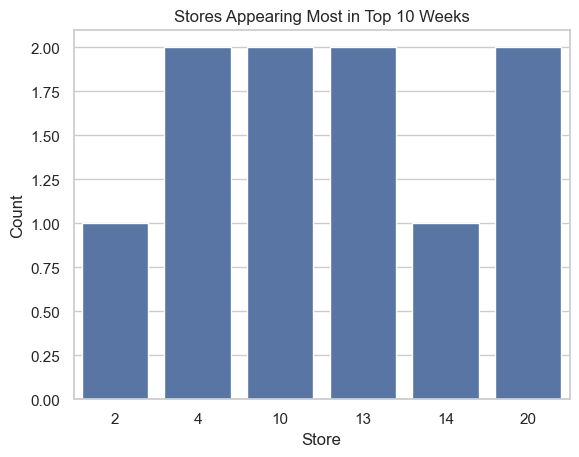

In [33]:
top_store_counts = top_weeks['Store'].value_counts()
print(top_store_counts)
# optional plot
sns.barplot(x=top_store_counts.index, y=top_store_counts.values)
plt.title("Stores Appearing Most in Top 10 Weeks")
plt.ylabel("Count")
plt.xlabel("Store")
plt.show()

# Weekly Sales Trend Over Time 

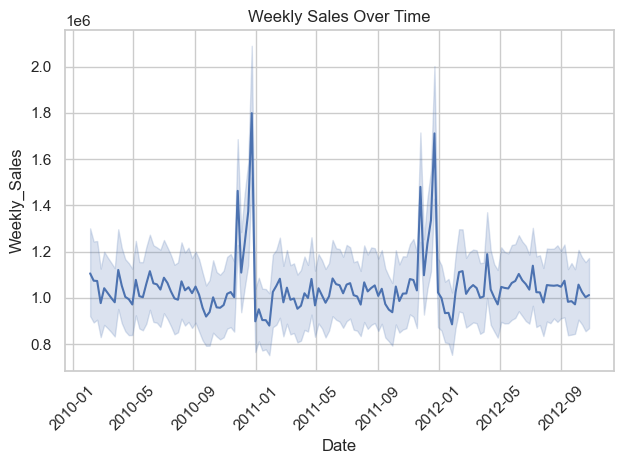

In [35]:
df_sorted = df.sort_values(by='Date')
sns.lineplot(x='Date', y='Weekly_Sales', data=df_sorted)
plt.title("Weekly Sales Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Store-Average Sales

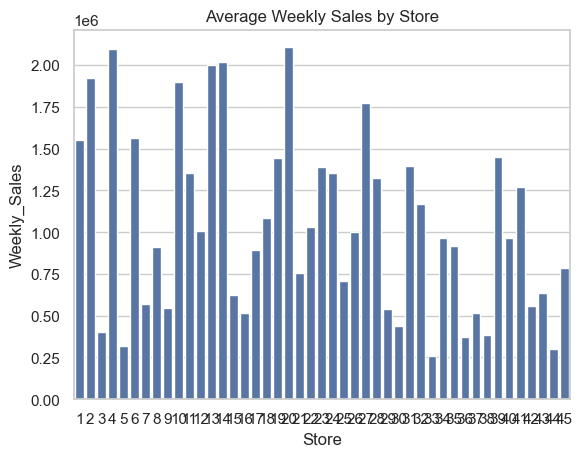

In [37]:
avg_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Store' , y='Weekly_Sales', data=avg_sales)
plt.title("Average Weekly Sales by Store")
plt.show()

# CPI(Consumer price Index) vs Sales

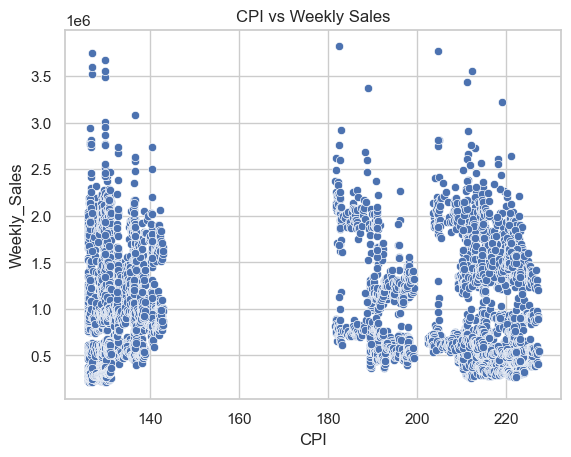

In [39]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title("CPI vs Weekly Sales")
plt.show()

# Unemployment Impact

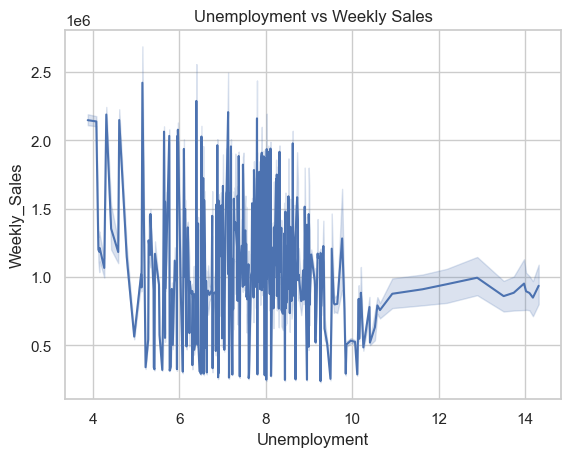

In [41]:
sns.lineplot(x='Unemployment',y='Weekly_Sales', data=df)
plt.title("Unemployment vs Weekly Sales")
plt.show()

# Sales by Weekday

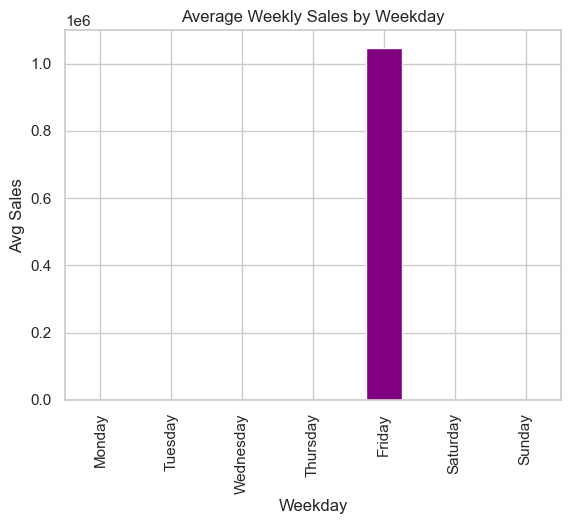

In [42]:
weekday_sales = df.groupby('Weekday')['Weekly_Sales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales.plot(kind='bar', color='purple')
plt.title("Average Weekly Sales by Weekday")
plt.ylabel("Avg Sales")
plt.show()

# Add moving Average for Trend 

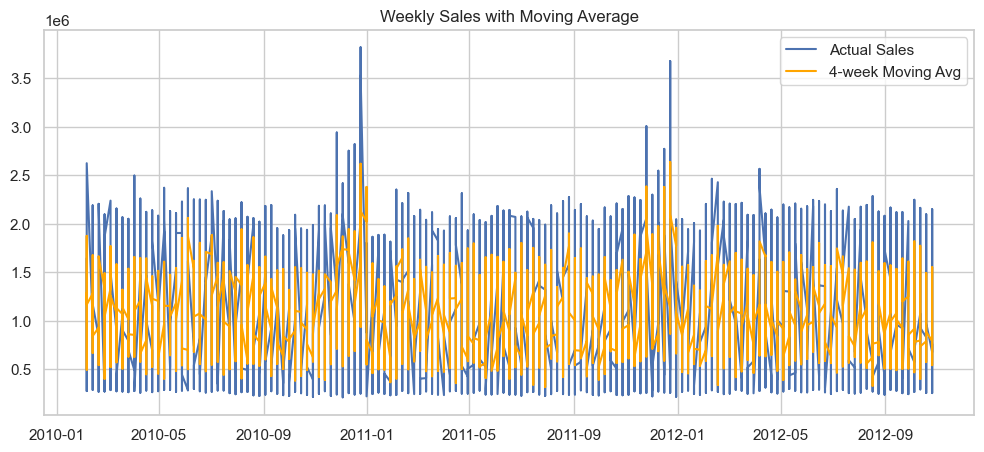

In [45]:
df_sorted = df.sort_values(by='Date')
df_sorted['Sales_MA'] = df_sorted['Weekly_Sales'].rolling(window=4).mean()
plt.figure(figsize=(12,5))
plt.plot(df_sorted['Date'],df_sorted['Weekly_Sales'],label='Actual Sales')
plt.plot(df_sorted['Date'],df_sorted['Sales_MA'],label='4-week Moving Avg', color='orange')
plt.title("Weekly Sales with Moving Average")
plt.legend()
plt.show()

# Store with most Holiday Weeks 

In [48]:
holiday_counts = df[df['Holiday_Flag'] == 1]['Store'].value_counts()
print(holiday_counts.head())

Store
1     10
24    10
26    10
27    10
28    10
Name: count, dtype: int64


# Store with most holiday weeks 
# filter only holiday weeks

Store with most holiday weeks:
Store
1     10
24    10
26    10
27    10
28    10
Name: count, dtype: int64


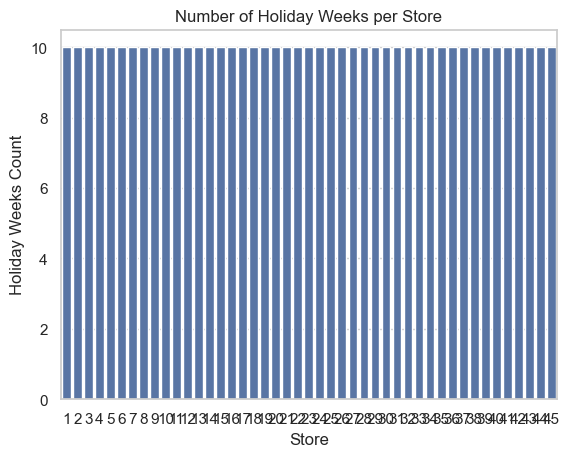

In [51]:
holiday_weeks = df[df['Holiday_Flag'] == 1]
store_holiday_counts = holiday_weeks['Store'].value_counts()
print("Store with most holiday weeks:")
print(store_holiday_counts.head())
#optional bar plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=store_holiday_counts.index, y=store_holiday_counts.values)
plt.title("Number of Holiday Weeks per Store")
plt.xlabel("Store")
plt.ylabel("Holiday Weeks Count")
plt.show()

# Average sales during holiday weeks per Store

In [52]:
holiday_sales_per_store = holiday_weeks.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
print(" Average Sales per Store during Holidays:")
print(holiday_sales_per_store.head())

 Average Sales per Store during Holidays:
Store
20    2249035.081
4     2243102.624
14    2120582.998
10    2113755.949
13    2113043.806
Name: Weekly_Sales, dtype: float64


# Summary & Insights

In [56]:
# Highest total sales store
top_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(1)
print("Higest Sales Store:\n", top_store)
#Month with higest total sales
top_month = df.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).head(1)
print("\n Month with Higest Sales:\n", top_month)
#Avg sales on Holiday vs non-holiday
avg_sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print("\n Avg Sales on Holiday vs Non-Holiday:\n",avg_sales_by_holiday)
#Correlation with unemployment
print("\n Unemployment vs Weekly Sales Correlation:\n", df[['Unemployment', 'Weekly_Sales']].corr())


Higest Sales Store:
 Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

 Month with Higest Sales:
 Month
7    6.500010e+08
Name: Weekly_Sales, dtype: float64

 Avg Sales on Holiday vs Non-Holiday:
 Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

 Unemployment vs Weekly Sales Correlation:
               Unemployment  Weekly_Sales
Unemployment      1.000000     -0.106176
Weekly_Sales     -0.106176      1.000000
